# Regresión Polinómica

### #Introducción, objetivo, y contexto#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../src')
from linear_regression import LinReg

,period,sales_quantity
0,2010-01-01,1055.508848
1,2010-02-01,995.455453
2,2010-03-01,1212.228686
3,2010-04-01,1202.393127
4,2010-05-01,1175.342713


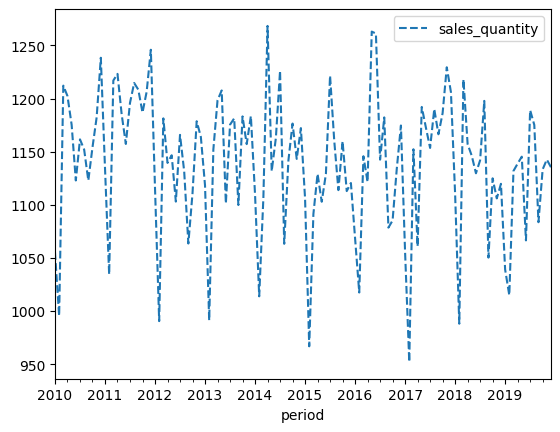

In [ ]:
# Cargamos los datos
Data = pd.read_csv('../data/poly_reg_train.csv', parse_dates=['period'])

# Graficamos y echamos un vistazo a los datos
Data.plot(x='period', y='sales_quantity', style='--')
Data.head()

### método que usé en el tp, usa 5 lags y variables binarias para cada mes. prueba y grafica la predicción para el conjunto de entrenamiento

In [ ]:
# Con el objetivo de intentar capturar la componente estacional,
# agregamos variables dummy para cada mes
month_dummies = pd.get_dummies(Data['period'].dt.month_name(), prefix='Month', drop_first=True)
month_dummies = month_dummies.astype(int)
df1 = pd.concat([Data, month_dummies], axis=1)

# Nos quedamos con los 5 valores anteriores, 
lags = []
for i in range(1, 6):
    df1[f'Lag_{i}'] = df1['sales_quantity'].shift(i)
    lags.append(f'Lag_{i}')

# Suprimimos los registros con valores nulos
df1.dropna(inplace=True)

115


In [ ]:
# Definimos el conjunto de variables predictoras y los targets
months = ['Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September']
vars = months + lags 
X = df1[vars].copy()
y = df1['sales_quantity'].copy()

# Entreno el modelo
Regresion = LinReg(verbose=True)
Regresion.fit(X,y)

# Imprimo el error cuadrático medio
print(Regresion.score(X,y))

Model trained!
1390.747453942295


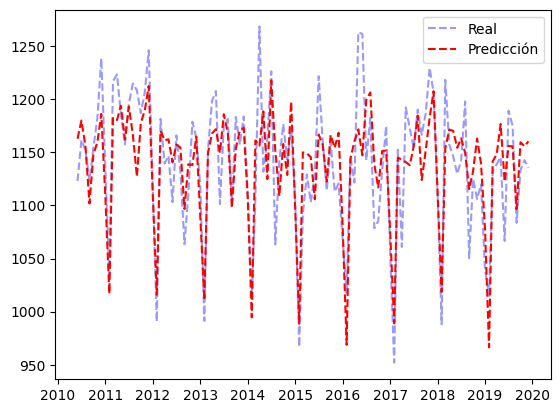

,sales_quantity,Prediccion
count,115.000000,115.000000
mean,1139.115515,1139.115510
std,63.133274,50.821920
min,952.188792,966.420016
25%,1110.156624,1124.310591
50%,1143.267619,1153.447924
75%,1181.874766,1167.225153
max,1268.409939,1217.615322


In [ ]:
# Realizo la predicción
df1['Prediccion'] = Regresion.predict(X)

# Miro las predicciones
plt.plot(df1["period"], df1["sales_quantity"],'--',c='Blue',label='Real', alpha=0.4)
plt.plot(df1["period"], Regresion.predict(X),'--',c='Red',label='Predicción')
plt.legend()
plt.show()

# Imprimo el resumen de las predicciones
df1[['sales_quantity', 'Prediccion']].describe()

### lags y polinomios. guardar crea una imagen en la carpeta plots y train utiliza el conjunto de entrenamiento para testear.
### imprime tanto el score de la predicción como el gráfico de comparación. cada score se guarda en un diccionario con una llave que indica el número de lags y el grado de los polinomios

In [ ]:
scores = {}

In [ ]:
def plot_poly_reg_results(lags, degrees, guardar=False, train=False):
    global scores

    df = pd.read_csv('../data/poly_reg_train.csv', parse_dates=['period'])
    for i in range(lags):
        df[f'lag_{i+1}'] = df['sales_quantity'].shift(i+1)
        for d in range(1, degrees):
            df[f'lag_{i+1}^{d+1}'] = df[f'lag_{i+1}'] ** (d+1)
    df.dropna(inplace=True)

    test = pd.read_csv('../data/poly_reg_test.csv', parse_dates=['period'])
    for i in range(lags):
        test[f'lag_{i+1}'] = test['sales_quantity'].shift(i+1)
        for d in range(1, degrees):
            test[f'lag_{i+1}^{d+1}'] = test[f'lag_{i+1}'] ** (d+1)
    test.dropna(inplace=True)

    X_test = test.drop(columns=['period', 'sales_quantity', 'deseasonalized', 'moving_avg'])
    y_test = test['sales_quantity']

    X = df.drop(columns=['period', 'sales_quantity'])
    y = df['sales_quantity']

    model = LinReg(verbose=True)
    model.fit(X, y)
    if train: 
        scores[f'L:{lags} D:{degrees}'] = model.score(X, y)
        print(f'MSE para {lags} lags y sus polinomios hasta grado {degrees} :' + str(model.score(X, y)))

        plt.plot(df["period"], df["sales_quantity"],'--',c='Blue',label='Real', alpha=0.4)
        plt.plot(df["period"], model.predict(X),'--',c='Red',label='Predicción')
        plt.title(f'Predicción vs Train. Lags:{lags}, Degrees:{degrees}')
        if guardar: plt.savefig(f'plots/pred_vs_train_lags-{lags}_degrees-{degrees}.png')
    else:
        scores[f'L:{lags} D:{degrees}'] = model.score(X_test, y_test)
        print(f'MSE para {lags} lags y sus polinomios hasta grado {degrees} :' + str(model.score(X_test, y_test)))
        plt.plot(test['period'], y_test, '--', c='Blue', label='Real', alpha=0.4)
        plt.plot(test['period'], model.predict(X_test), '--', c='Red', label='Predicción')
        plt.title(f'Predicción vs Real. Lags:{lags}, Degrees:{degrees}')
        if guardar: plt.savefig(f'plots/pred_vs_test_lags-{lags}_degrees-{degrees}.png')
    plt.legend()
    plt.show()

Model trained!
MSE para 12 lags y sus polinomios hasta grado 22772.2111463372567


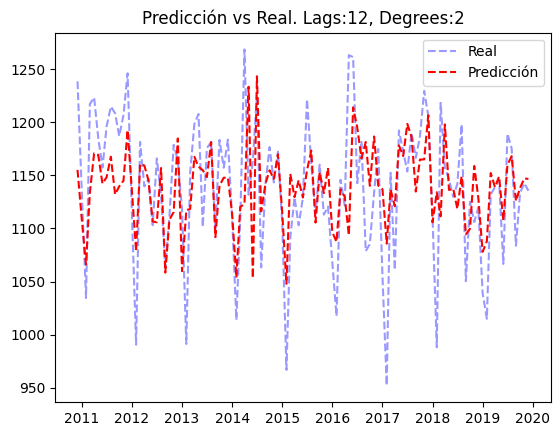

Model trained!
MSE para 12 lags y sus polinomios hasta grado 32368.7693428628168


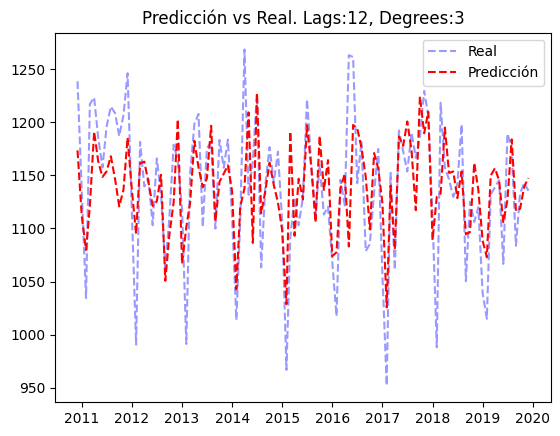

Model trained!
MSE para 12 lags y sus polinomios hasta grado 41906.591095195651


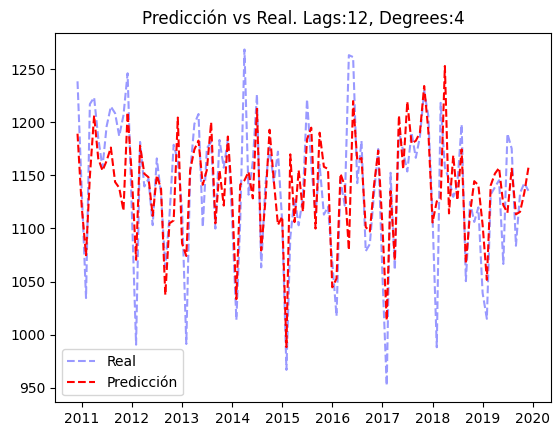

Model trained!
MSE para 13 lags y sus polinomios hasta grado 21746.7205825255967


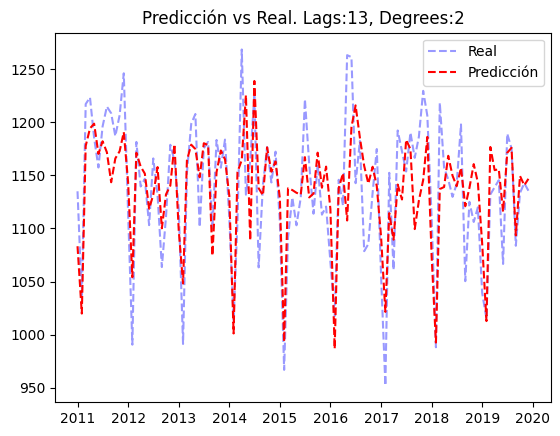

Model trained!
MSE para 13 lags y sus polinomios hasta grado 31438.4550364348597


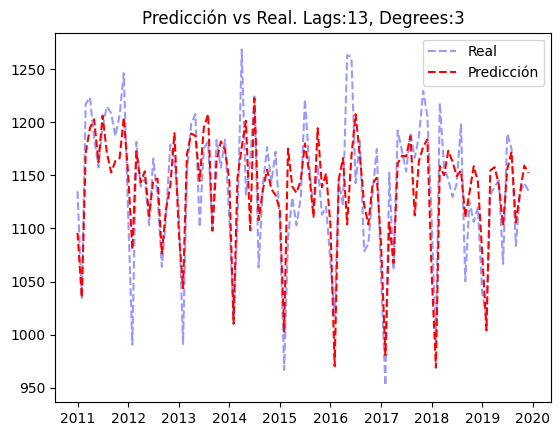

Model trained!
MSE para 13 lags y sus polinomios hasta grado 41114.8472885787398


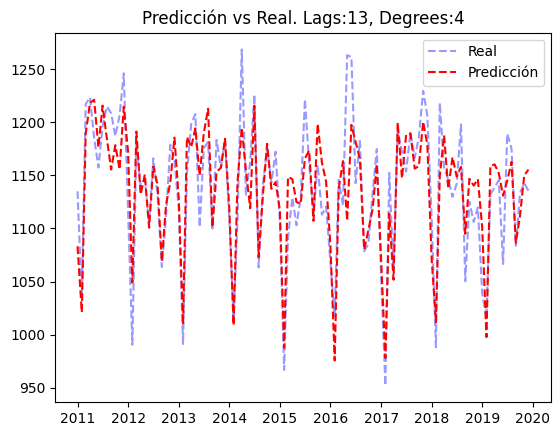

Model trained!
MSE para 14 lags y sus polinomios hasta grado 21706.0168815012914


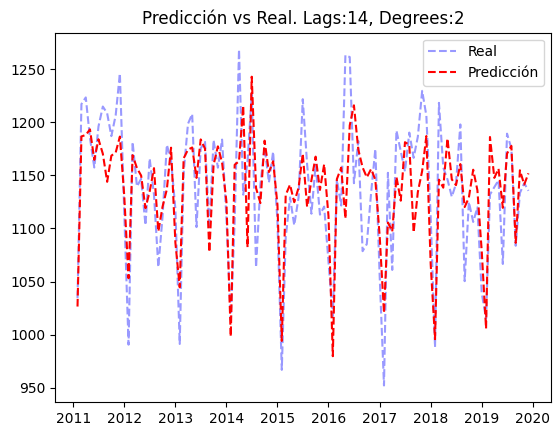

Model trained!
MSE para 14 lags y sus polinomios hasta grado 31397.2016725392966


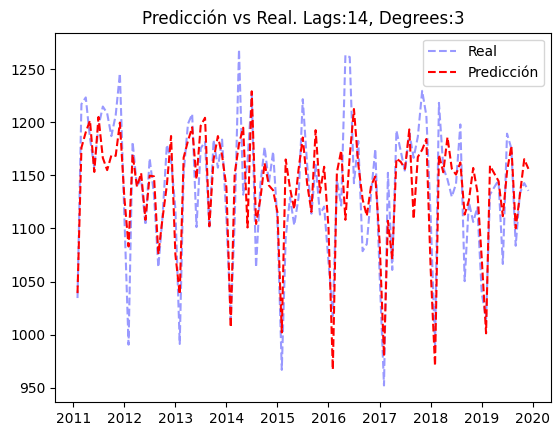

Model trained!
MSE para 14 lags y sus polinomios hasta grado 4970.233711408686


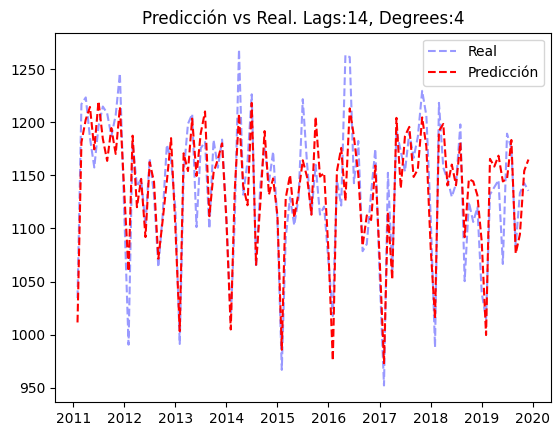

Model trained!
MSE para 15 lags y sus polinomios hasta grado 21595.1993556884145


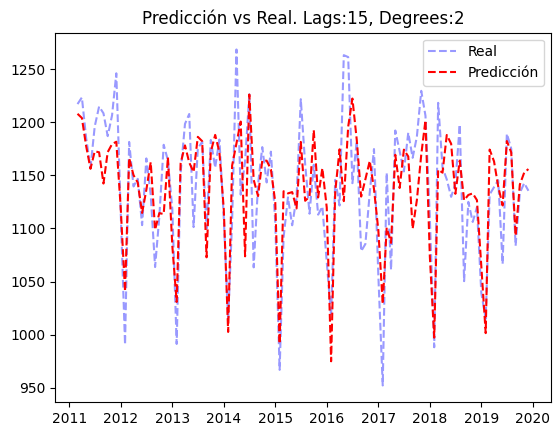

Model trained!
MSE para 15 lags y sus polinomios hasta grado 31336.5419878453151


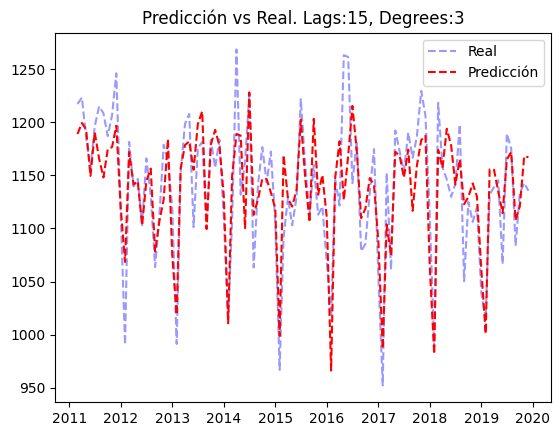

Model trained!
MSE para 15 lags y sus polinomios hasta grado 4846.9594301155673


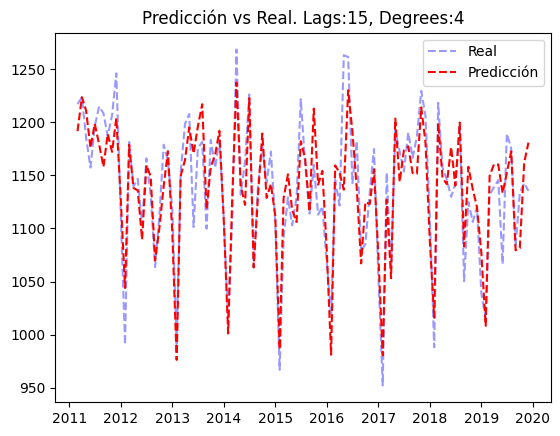

Model trained!
MSE para 16 lags y sus polinomios hasta grado 21524.229793136859


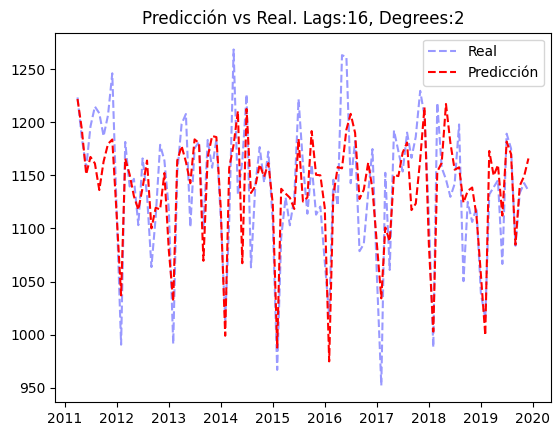

Model trained!
MSE para 16 lags y sus polinomios hasta grado 31232.1095757238472


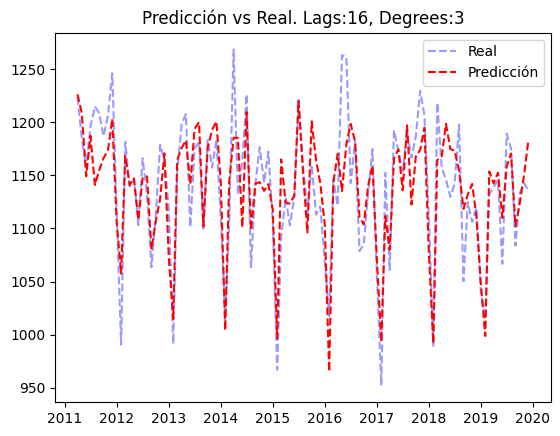

Model trained!
MSE para 16 lags y sus polinomios hasta grado 4631.264478717503


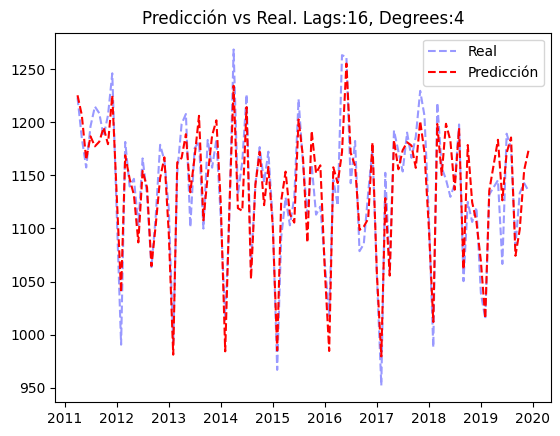

Model trained!
MSE para 17 lags y sus polinomios hasta grado 21514.3195456616463


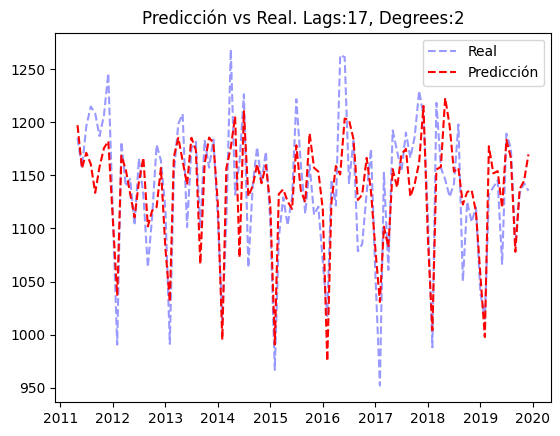

Model trained!
MSE para 17 lags y sus polinomios hasta grado 31225.8558926747683


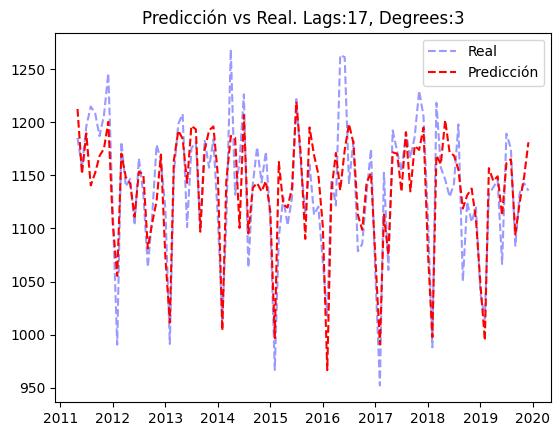

Model trained!
MSE para 17 lags y sus polinomios hasta grado 4516.6594204824988


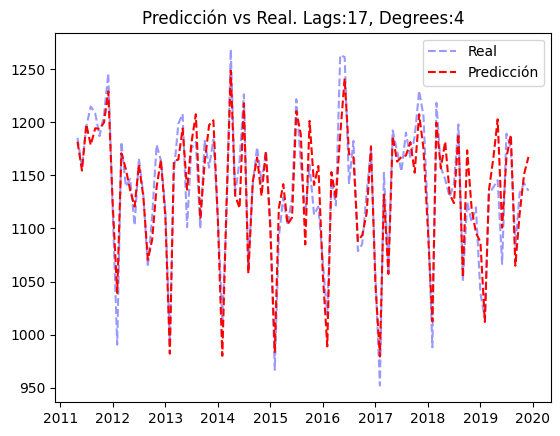

Model trained!
MSE para 18 lags y sus polinomios hasta grado 21439.8421316230126


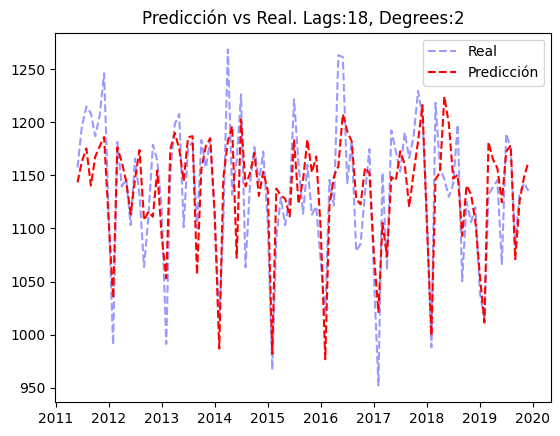

Model trained!
MSE para 18 lags y sus polinomios hasta grado 31075.0048008791684


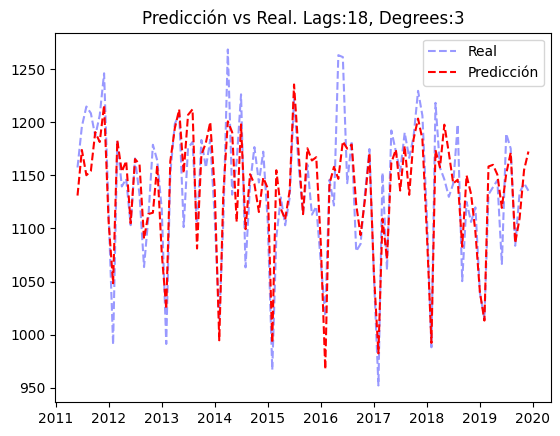

Model trained!
MSE para 18 lags y sus polinomios hasta grado 4461.4059242024597


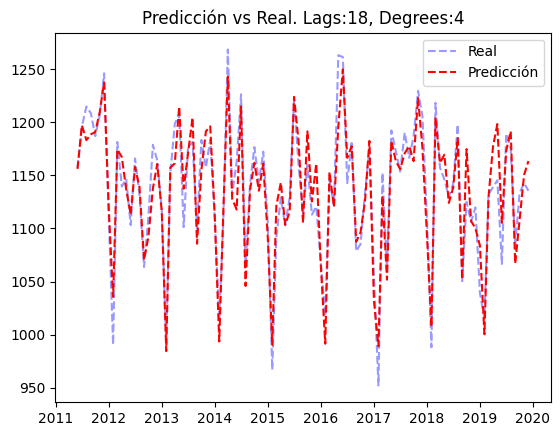

Model trained!
MSE para 19 lags y sus polinomios hasta grado 21405.417015990106


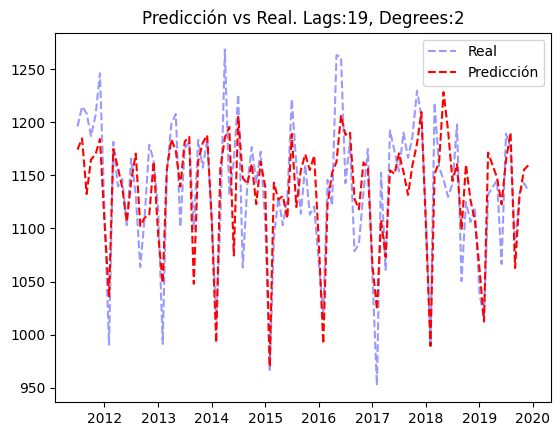

Model trained!
MSE para 19 lags y sus polinomios hasta grado 31024.2271647786567


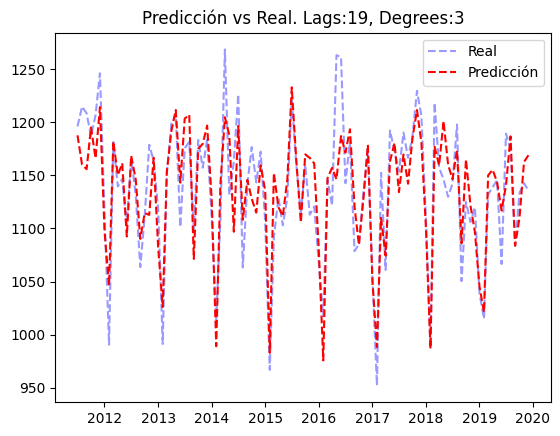

Model trained!
MSE para 19 lags y sus polinomios hasta grado 4447.75622401516677


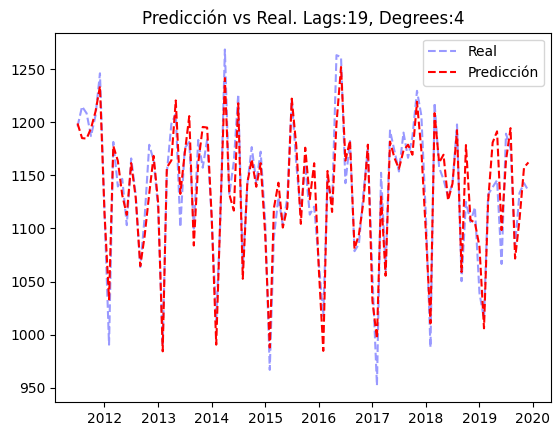

In [ ]:
for i in range(1, 20):
    for d in range(3, 5):
        plot_poly_reg_results(i, d)

Model trained!
MSE para 24 lags y sus polinomios hasta grado 4 :72.4486681306743


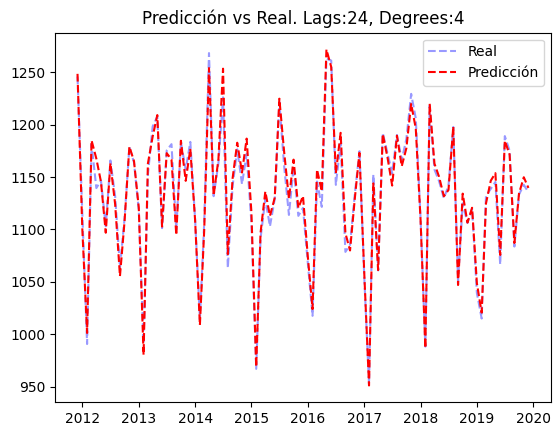

In [174]:
plot_poly_reg_results(24, 5)

In [164]:
scores

{'L:1 D:2': np.float64(4105.398113594336),
 'L:1 D:3': np.float64(4105.398113594336),
 'L:1 D:4': np.float64(4105.398113594336),
 'L:2 D:2': np.float64(3799.4790566197476),
 'L:2 D:3': np.float64(3721.703003829163),
 'L:2 D:4': np.float64(3711.6870764624537),
 'L:3 D:2': np.float64(3589.058564935494),
 'L:3 D:3': np.float64(3499.2063492032385),
 'L:3 D:4': np.float64(3491.5822596356415),
 'L:4 D:2': np.float64(3376.787073727676),
 'L:4 D:3': np.float64(3315.388221788511),
 'L:4 D:4': np.float64(3302.239193564758),
 'L:5 D:2': np.float64(3392.314140598555),
 'L:5 D:3': np.float64(3296.3832340187046),
 'L:5 D:4': np.float64(3226.892783635177),
 'L:6 D:2': np.float64(3234.096637595618),
 'L:6 D:3': np.float64(3055.352971667267),
 'L:6 D:4': np.float64(2960.3787162240387),
 'L:7 D:2': np.float64(3183.7357600441565),
 'L:7 D:3': np.float64(3001.1693783765204),
 'L:7 D:4': np.float64(2800.1173009739723),
 'L:8 D:2': np.float64(3199.185709340036),
 'L:8 D:3': np.float64(3018.24360269969),
 'L